# Классификация пород кошек и собак по лицу

Используем упрощенный датасет [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) с вырезанными лицами домашних животных. Для начала загружаем датасет:

In [2]:
!wget http://www.soshnikov.com/permanent/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz
!rm petfaces.tar.gz

--2024-10-05 16:11:11--  http://www.soshnikov.com/permanent/data/petfaces.tar.gz
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-tar]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M   793KB/s    in 30s     

2024-10-05 16:11:42 (786 KB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]



Для визуализации списка изображений можно использовать такую функцию:

In [4]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import cv2

# Путь к папке с изображениями
data_dir = '/content/petfaces'

# Функция для загрузки и предобработки данных
def load_and_preprocess_data(data_dir):
  images = []
  labels = []
  for folder in os.listdir(data_dir):
    if 'cat' in folder:
      class_index = 0
    else:
      class_index = 1
    class_dir = os.path.join(data_dir, folder)
    for filename in os.listdir(class_dir):
      img_path = os.path.join(class_dir, filename)
      img = cv2.imread(img_path)
      if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))  # Изменение размера изображений
        img = img / 255.0  # Нормализация пикселей
        images.append(img)
        labels.append(class_index)
  return np.array(images), np.array(labels)

# Загрузка и предобработка данных
images, labels = load_and_preprocess_data(data_dir)
# Разделение данных на обучающую и тестовую выборки с сохранением пропорции классов
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

# Создание модели CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Бинарная классификация
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.6208 - loss: 0.6613 - val_accuracy: 0.8268 - val_loss: 0.4673
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8428 - loss: 0.3684 - val_accuracy: 0.8872 - val_loss: 0.3136
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8698 - loss: 0.2994 - val_accuracy: 0.9008 - val_loss: 0.2825
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9157 - loss: 0.2079 - val_accuracy: 0.8969 - val_loss: 0.2638
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9321 - loss: 0.1580 - val_accuracy: 0.8949 - val_loss: 0.2858
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9533 - loss: 0.1244 - val_accuracy: 0.8911 - val_loss: 0.2716
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9600 - loss: 0.0983 - val_accuracy: 0.9105 - val_loss: 0.2366
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9696 - loss: 0.0815 - val_accuracy: 0.9183 - val_loss

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


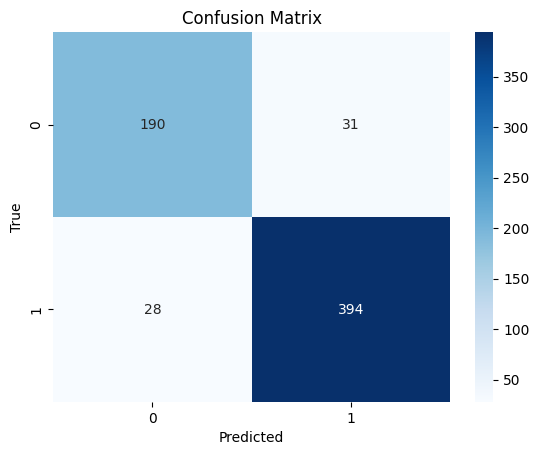

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Предсказание классов для тестовых данных
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Построение confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Визуализация confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.0806 - loss: 4.5482 - val_accuracy: 0.0311 - val_loss: 6.4479
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2052 - loss: 2.9224 - val_accuracy: 0.0292 - val_loss: 10.1226
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2958 - loss: 2.6059 - val_accuracy: 0.0584 - val_loss: 8.2147
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3982 - loss: 2.2224 - val_accuracy: 0.0623 - val_loss: 6.8110
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4775 - loss: 1.8402 - val_accuracy: 0.1226 - val_loss: 6.4300
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5407 - loss: 1.5523 - val_accuracy: 0.2179 - val_loss: 3.6881
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5841 - loss: 1.3208 - val_accuracy: 0.2646 - val_loss: 3.4576
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6604 - loss: 1.1197 - val_accuracy: 0.3852 - val_lo

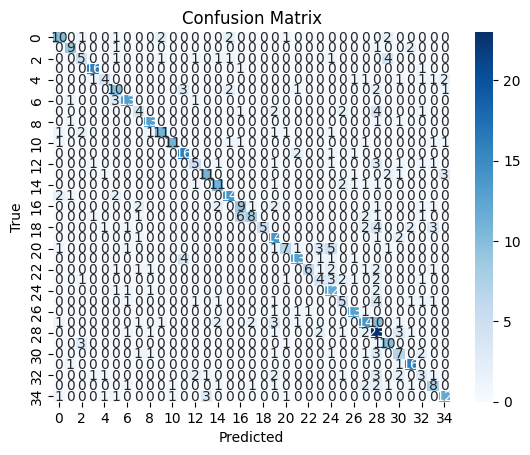

In [10]:
# Путь к папке с изображениями
data_dir = '/content/petfaces'

# Функция для загрузки и предобработки данных
def load_and_preprocess_data(data_dir):
  images = []
  labels = []
  class_mapping = {}  # Словарь для сопоставления имен папок с индексами классов
  class_index = 0
  for folder in os.listdir(data_dir):
    breed = folder.split('_')[1]  # Извлечение породы из имени папки
    if breed not in class_mapping:
      class_mapping[breed] = class_index
      class_index += 1
    class_dir = os.path.join(data_dir, folder)
    for filename in os.listdir(class_dir):
      img_path = os.path.join(class_dir, filename)
      img = cv2.imread(img_path)
      if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))  # Изменение размера изображений
        img = img / 255.0  # Нормализация пикселей
        images.append(img)
        labels.append(class_mapping[breed])
  return np.array(images), np.array(labels), class_mapping

# Загрузка и предобработка данных
images, labels, class_mapping = load_and_preprocess_data(data_dir)
# Разделение данных на обучающую и тестовую выборки с сохранением пропорции классов
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

num_classes = len(set(labels))

# Создание модели CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


# Предсказание классов для тестовых данных
y_pred = np.argmax(model.predict(X_test), axis=1)

# Построение confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Визуализация confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# Предсказание вероятностей для тестовых данных
y_pred_probs = model.predict(X_test)

# Получение топ-3 предсказаний для каждого изображения
top3_predictions = np.argsort(y_pred_probs, axis=1)[:, -3:]

# Подсчет количества правильных предсказаний в топ-3
top3_correct_count = 0
for i in range(len(y_test)):
  if y_test[i] in top3_predictions[i]:
    top3_correct_count += 1

# Вычисление top-3 accuracy
top3_accuracy = top3_correct_count / len(y_test)

print('Top-3 accuracy:', top3_accuracy)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Top-3 accuracy: 0.7744945567651633


In [13]:
def create_model(num_neurons, filter_size, learning_rate):
  model = keras.Sequential([
    layers.Conv2D(32, filter_size, activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, filter_size, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, filter_size, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(num_neurons, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Гиперпараметры для оптимизации
num_neurons_options = [64, 128, 256]
filter_size_options = [(3, 3), (5, 5)]
learning_rate_options = [0.001, 0.01, 0.1]

best_accuracy = 0
best_params = {}

for num_neurons in num_neurons_options:
  for filter_size in filter_size_options:
    for learning_rate in learning_rate_options:
      model = create_model(num_neurons, filter_size, learning_rate)
      model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)  # Обучаем модель
      _, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Оцениваем модель

      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'num_neurons': num_neurons, 'filter_size': filter_size,
                       'learning_rate': learning_rate}

print(f"Лучший результат: {best_accuracy}, параметры {best_params}")


Лучший результат: 0.5894245505332947, параметры {'num_neurons': 256, 'filter_size': (3, 3), 'learning_rate': 0.001}
